In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Cargar los DataFrames desde los archivos CSV previamente guardados
df = '/content/drive/My Drive/PI MLOps - STEAM/Total.csv'



In [ ]:
df = pd.read_csv(df)

In [ ]:
#df= pd.read_csv('c:/Users/nissi/OneDrive/Escritorio/PI MLOps - STEAM/Total.csv')

In [ ]:
#primero reviso el dataframe completo
print(df.shape)
df.head()

(23174, 8)


,genres,release_date,user_id,recommend,sentiment_analysis,item_id,item_name,playtime_forever
0,"action, casual, indie, simulation, strategy",2018.0,76561198083488994,True,2,550,Left 4 Dead 2,161.0
1,"free to play, indie, rpg, strategy",2018.0,76561198054465623,True,2,15900,7 Wonders II,0.0
2,"free to play, indie, rpg, strategy",2018.0,711armageddoncarmageddon,True,1,218680,Scribblenauts Unlimited,195.0
3,"free to play, indie, rpg, strategy",2018.0,76561198039441595,False,1,222980,Dead Pixels,0.0
4,"free to play, indie, rpg, strategy",2018.0,76561198076548816,True,2,57740,Jagged Alliance - Back in Action,135.0


In [ ]:
df.dtypes

genres                 object
release_date          float64
user_id                object
recommend              object
sentiment_analysis      int64
item_id                 int64
item_name              object
playtime_forever      float64
dtype: object

In [ ]:
print(len(df['user_id'].unique()))

22883


In [ ]:
# Calificaciones de juegos por usuario

df1_by_users = df.groupby(['user_id']).count()
df1_by_users.head()

,genres,release_date,recommend,sentiment_analysis,item_id,item_name,playtime_forever
user_id,,,,,,,
--000--,1,1,1,1,1,1,1
--ace--,1,1,1,1,1,1,1
--ionex--,1,0,1,1,1,1,1
-2SV-vuLB-Kg,1,0,1,1,1,1,1
-Azsael-,1,1,1,1,1,1,1


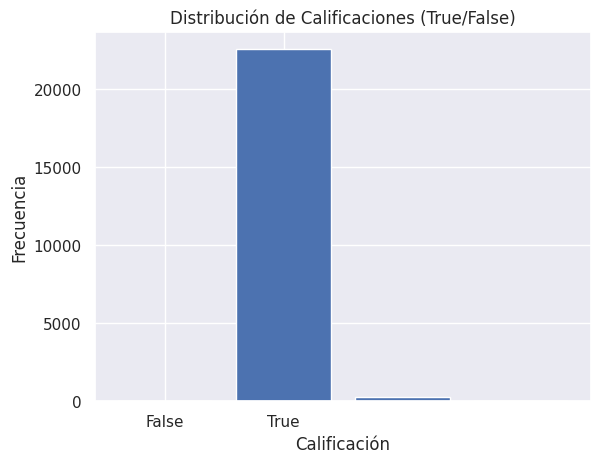

In [ ]:
#observo comportamiento de variables
recommend_counts = df1_by_users['recommend'].value_counts()
plt.bar(recommend_counts.index, recommend_counts.values)
plt.title('Distribución de Calificaciones (True/False)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.xticks([False, True], ['False', 'True'])  # Etiquetas para el eje x

plt.show()

In [ ]:
df1_by_games = df.groupby(['item_name']).count()
df1_by_games.head()

,genres,release_date,user_id,recommend,sentiment_analysis,item_id,playtime_forever
item_name,,,,,,,
"""Glow Ball"" - The billiard puzzle game",1,1,1,1,1,1,1
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),1,1,1,1,1,1,1
"10,000,000",6,5,6,6,6,6,6
100% Orange Juice,9,9,9,9,9,9,9
1001 Spikes,2,1,2,2,2,2,2


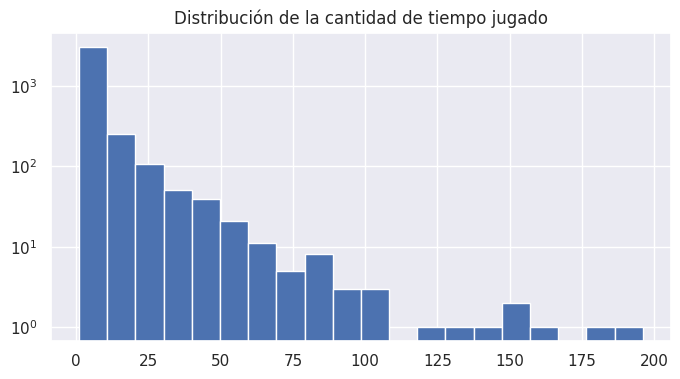

In [ ]:
plt.figure(figsize = (8,4))

df1_by_games.playtime_forever[df1_by_games.playtime_forever<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de tiempo jugado')

plt.show()

In [ ]:
#filtro el dataframe con las reacciones positivas y neutrales y juegos recomendados
df_positivas = df[df['recommend'] == True]
df_recomendados = df[df['sentiment_analysis'] == 2]
df_1 = df[(df['recommend'] == True) & (df['sentiment_analysis'] == 2)]



In [ ]:
df_1['user_id'].duplicated().sum()

184

In [ ]:
# Eliminar duplicados en la columna 'user_id'
df_2 = df_1.drop_duplicates(subset='user_id')

In [ ]:
#tomo una muestra para que la matriz no se sobredimensione
muestra = df_2.sample(n=50, random_state=42)
muestra_df = pd.DataFrame(muestra)

In [ ]:
muestra_df

,genres,release_date,user_id,recommend,sentiment_analysis,item_id,item_name,playtime_forever
4901,"adventure, free to play, rpg, early access",NaN,Doctor_Smooth,True,2,32500,STAR WARS™: The Force Unleashed™ II,9.0
5341,"adventure, free to play, rpg, early access",NaN,NKraz,True,2,251570,7 Days to Die,377.0
13512,adventure,2006.0,Fonzatrademark,True,2,334230,Town of Salem,2427.0
6541,"adventure, free to play, rpg, early access",NaN,SuperRowando,True,2,226620,Desktop Dungeons,18.0
13133,adventure,2006.0,SeaMayk,True,2,301520,Robocraft,16.0
12417,action,2000.0,76561198043415920,True,2,243870,Tom Clancy's Ghost Recon Phantoms - NA,1761.0
20771,"action, free to play, massively multiplayer, s...",2013.0,76561198045470612,True,2,35420,Killing Floor Mod: Defence Alliance 2,0.0
11816,action,2003.0,iaintachikenbutiamashitplayer,True,2,12210,Grand Theft Auto IV,11.0
22344,"adventure, indie, early access",2016.0,loseitintheend,True,2,17300,Crysis,0.0
9092,racing,2005.0,76561198053887236,True,2,209870,Blacklight: Retribution,1023.0


In [ ]:
#la matriz tiene una dimension de 50*46, debo ver donde esta la falla
#para eso tomo de la muestra los juegos unicos
juegos_unicos = muestra_df['item_name'].unique()
subconjunto_juegos = juegos_unicos[:50]


In [ ]:
# Filtro el DataFrame para incluir solo los juegos en el subconjunto
muestra_subconjunto = muestra_df[muestra_df['item_name'].isin(subconjunto_juegos)]

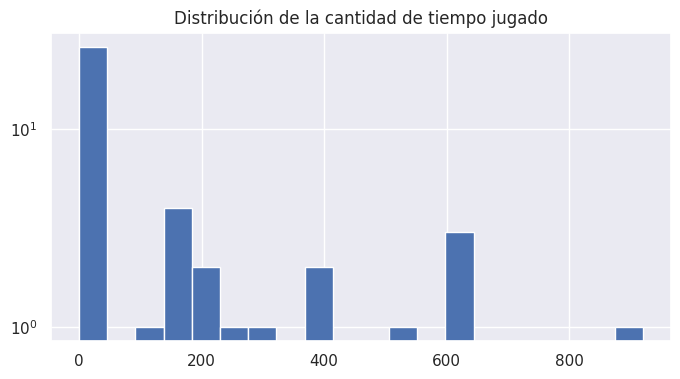

In [ ]:
plt.figure(figsize = (8,4))

muestra_subconjunto.playtime_forever[muestra_subconjunto.playtime_forever<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de tiempo jugado')

plt.show()

In [ ]:
# creo la tabla pivote con el DataFrame sin duplicados
#sigue mal dimensionada
matriz_usuario_juego = muestra_subconjunto.pivot_table(index='user_id', columns='item_name', values='sentiment_analysis', fill_value=0)

In [ ]:
#aqui dimensiono la matriz
matriz_usuario_juego_dim = np.zeros((50, 50))

# Lleno la matriz con los valores correspondientes de matriz_usuario_juego
for i, usuario in enumerate(matriz_usuario_juego.index):
    for j, juego in enumerate(subconjunto_juegos):
        if juego in matriz_usuario_juego.columns:
            matriz_usuario_juego_dim[i, j] = matriz_usuario_juego.loc[usuario, juego]


In [ ]:
print(matriz_usuario_juego_dim)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
valores_nulos = np.isnan(matriz_usuario_juego_dim)
cantidad_nulos = np.sum(valores_nulos)

print("Cantidad de valores nulos en la matriz:", cantidad_nulos)

Cantidad de valores nulos en la matriz: 0


In [ ]:
#ahora si se dimensiona
dimensiones_matriz_usuario_juego_norm = matriz_usuario_juego_dim.shape
print("Dimensiones de matriz_usuario_juego_norm:", dimensiones_matriz_usuario_juego_norm)


Dimensiones de matriz_usuario_juego_norm: (50, 50)


In [ ]:
#guardo la matriz en un dataframe para el modelo de recomendacion
similarity_df = pd.DataFrame(matriz_usuario_juego_dim, index=muestra_df['user_id'], columns=muestra_df['item_name'])

In [ ]:
similarity_df

item_name,STAR WARS™: The Force Unleashed™ II,7 Days to Die,Town of Salem,Desktop Dungeons,Robocraft,Tom Clancy's Ghost Recon Phantoms - NA,Killing Floor Mod: Defence Alliance 2,Grand Theft Auto IV,Crysis,Blacklight: Retribution,...,METAL GEAR SOLID V: GROUND ZEROES,Mirror's Edge,Sanctum 2,Robocraft,Gravilon,The Witcher 2: Assassins of Kings Enhanced Edition,Lords Of The Fallen,CivCity: Rome,Half-Life 2: Deathmatch,Counter-Strike: Source
user_id,,,,,,,,,,,,,,,,,,,,,
Doctor_Smooth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NKraz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fonzatrademark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SuperRowando,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SeaMayk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561198043415920,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561198045470612,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iaintachikenbutiamashitplayer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loseitintheend,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

def encontrar_juegos_similares(similarity_df, num_juegos_similares):


    usuario = input("Ingresa tu nombre de usuario: ")

    try:
        indice_usuario = similarity_df.index.get_loc(usuario)
    except KeyError:
        return "Usuario no encontrado en la matriz de similitud."

    fila_similitud = similarity_df.iloc[indice_usuario, :]
    juegos_ordenados = np.argsort(fila_similitud)[::-1]
    juegos_seleccionados = juegos_ordenados[:num_juegos_similares]

    return juegos_seleccionados


num_juegos_similares = 5
juegos_similares = encontrar_juegos_similares(similarity_df, num_juegos_similares)

print("Juegos similares al juego de entrada:")
print(juegos_similares)

Ingresa tu nombre de usuario: shay181
Juegos similares al juego de entrada:
item_name
Counter-Strike: Source                                44
Half-Life 2: Deathmatch                               49
CivCity: Rome                                         11
Lords Of The Fallen                                   21
The Witcher 2: Assassins of Kings Enhanced Edition    20
Name: shay181, dtype: int64


In [ ]:
ruta_guardar = '/content/drive/My Drive/PI MLOps - STEAM/Sdf.csv'
similarity_df.to_csv(ruta_guardar, index=True)  # index=False evita que se guarde el índice del DataFrame en el archivo